In [86]:
import pandas as pd
df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [87]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [88]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [89]:
df.drop(['Unnamed: 0','Checking account','Sex'] , axis=1 , inplace=True)

In [90]:
df.dropna(inplace=True)

In [91]:
df.head()

,Age,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
1,22,2,own,little,5951,48,radio/TV
2,49,1,own,little,2096,12,education
3,45,2,free,little,7882,42,furniture/equipment
4,53,2,free,little,4870,24,car
6,53,2,own,quite rich,2835,24,furniture/equipment


In [92]:
df.head()

,Age,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
1,22,2,own,little,5951,48,radio/TV
2,49,1,own,little,2096,12,education
3,45,2,free,little,7882,42,furniture/equipment
4,53,2,free,little,4870,24,car
6,53,2,own,quite rich,2835,24,furniture/equipment


In [93]:
df['Saving accounts'].fillna(method='ffill' , inplace=True)

In [94]:
df.isnull().sum()

Age                0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
dtype: int64

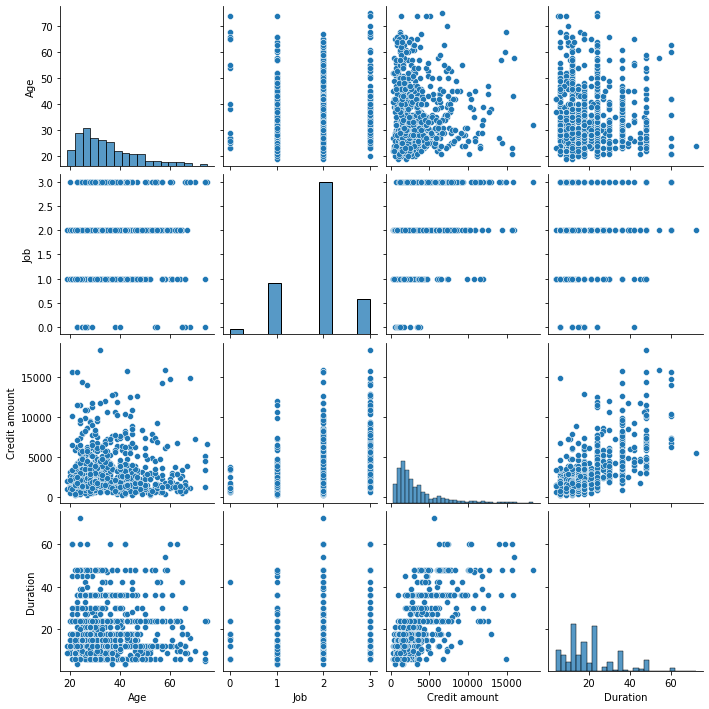

In [95]:
import seaborn as sns
sns.pairplot(df)

In [96]:
df.head()

,Age,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
1,22,2,own,little,5951,48,radio/TV
2,49,1,own,little,2096,12,education
3,45,2,free,little,7882,42,furniture/equipment
4,53,2,free,little,4870,24,car
6,53,2,own,quite rich,2835,24,furniture/equipment


C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit amount'>

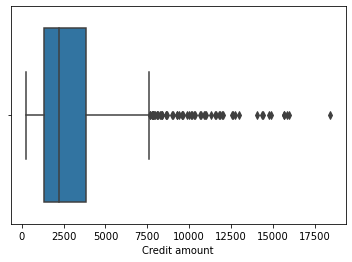

In [97]:
sns.boxplot(df['Credit amount'])

In [98]:
df['Credit amount'].skew()

2.144908365271921

In [99]:
q1=df['Credit amount'].quantile(0.25)

In [100]:
q3=df['Credit amount'].quantile(0.75)

In [101]:
iqr=q3-q1

In [102]:
ll=q1-1.5*iqr

In [103]:
ul=q3+1.5*iqr

In [104]:
import numpy as np
df['Credit amount'] = np.where(df['Credit amount']>ul,ul,
                              np.where(df['Credit amount']<ll,ll,
                                      df['Credit amount']))

C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit amount'>

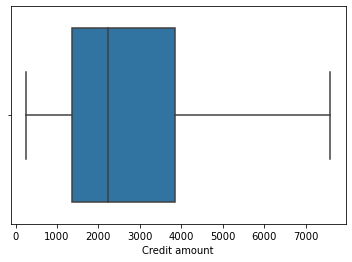

In [105]:
sns.boxplot(df['Credit amount'])

C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

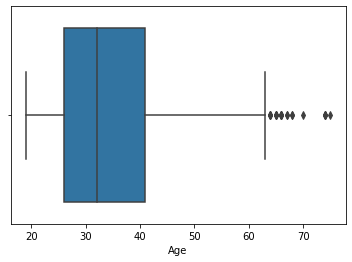

In [106]:
sns.boxplot(df['Age'])

In [107]:
df['Age'].skew()

1.0825614288405228

In [108]:
q1=df['Age'].quantile(0.25)

In [109]:
q3=df['Age'].quantile(0.75)

In [110]:
iqr=q3-q1

In [111]:
ll=q1-1.5*iqr

In [112]:
ul=q3+1.5*iqr

In [113]:
import numpy as np
df['Age'] = np.where(df['Age']>ul,ul,
                              np.where(df['Age']<ll,ll,
                                      df['Age']))

C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

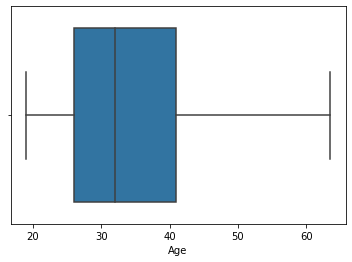

In [114]:
sns.boxplot(df['Age'])

In [115]:
x = df.drop(columns=['Credit amount'])
x

,Age,Job,Housing,Saving accounts,Duration,Purpose
1,22.0,2,own,little,48,radio/TV
2,49.0,1,own,little,12,education
3,45.0,2,free,little,42,furniture/equipment
4,53.0,2,free,little,24,car
6,53.0,2,own,quite rich,24,furniture/equipment
...,...,...,...,...,...,...
995,31.0,1,own,little,12,furniture/equipment
996,40.0,3,own,little,30,car
997,38.0,2,own,little,12,radio/TV
998,23.0,2,free,little,45,radio/TV


In [116]:
y=df['Credit amount']
y

1      5951.0
2      2096.0
3      7592.5
4      4870.0
6      2835.0
        ...  
995    1736.0
996    3857.0
997     804.0
998    1845.0
999    4576.0
Name: Credit amount, Length: 817, dtype: float64

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                random_state=42)

In [118]:
y_test

237    2767.0
581    3124.0
298    2515.0
658    4221.0
656     888.0
        ...  
537    3612.0
932    1224.0
634    1355.0
812    7592.5
806     590.0
Name: Credit amount, Length: 164, dtype: float64

In [119]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 653 entries, 544 to 129
Series name: Credit amount
Non-Null Count  Dtype  
--------------  -----  
653 non-null    float64
dtypes: float64(1)
memory usage: 10.2 KB


In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

In [121]:
trf1 = ColumnTransformer( transformers=[
    ('c',OrdinalEncoder(categories=[['own', 'free', 'rent']],unknown_value=-1, handle_unknown='use_encoded_value') , [2]),
    ('b',OrdinalEncoder(categories=[['little', 'moderate', 'quite rich', 'rich']],unknown_value=-1, handle_unknown='use_encoded_value') , [3])
],remainder='passthrough')

In [122]:
trf2 = ColumnTransformer( transformers=[
    ('a',OneHotEncoder(handle_unknown = 'ignore'),[5])
],remainder='passthrough')

In [123]:
from sklearn.linear_model import LinearRegression
trf3 =LinearRegression()

In [124]:
from sklearn.pipeline import Pipeline,make_pipeline
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [125]:
# pipe.fit(x_train,y_train)
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('c',
                                                  OrdinalEncoder(categories=[['own',
                                                                              'free',
                                                                              'rent']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [2]),
                                                 ('b',
                                                  OrdinalEncoder(categories=[['little',
                                                                              'moderate',
                                                                              'quite '
                                                                              'rich',
                                                                              'rich']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('a',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [5])])),
                ('trf3', LinearRegression())])

In [126]:
from sklearn import set_config
set_config(display='diagram')

In [127]:
y_pred = pipe.predict(x_test)

In [128]:
y_pred

array([2745.56133106, 1988.66109824, 2849.5219815 , 3981.6546174 ,
       1945.49605454, 4857.51876076, 1109.34370974, 4306.63129041,
       2724.07773884, 1527.45813479, 4608.76377826, 1111.3845527 ,
       2138.25339176, 4871.6648092 , 2185.40166374, 6025.13736483,
       4032.46353729, 1267.58534958, 2844.83232614, 1429.02844613,
       2891.8614902 ,  972.50878883, 2735.66069332,  990.63983958,
       2910.26502747, 5527.85577408, 2073.58055748, 4235.8575116 ,
       3334.24175198, 4082.759194  , 1324.87017821, 4916.87069585,
        741.20199303, 3280.28544736, 2855.62358706, 1119.42965659,
       1585.32293643, 2277.90920097, 3957.95371827, 2455.16300855,
       2240.48800984, 2817.85417383, 4142.62198393, 3497.88889646,
        894.75437306, 1668.81896533, 3767.83548735, 3412.53727068,
       2612.07356951, 2419.43443827, 2138.81044738, 1863.07380314,
       3164.99415066, 1570.62317849, 2061.73432964, 2833.41786065,
       4649.75816344, 2224.4670472 , 5630.37275286, 2732.92661

In [129]:
# export 
import pickle
pickle.dump(pipe,open('pipe_credit.pkl','wb'))